<a href="https://colab.research.google.com/github/maralerdene/DIVER/blob/main/Iris_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problem 1] Data acquisition

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
data = load_iris()
x = pd.DataFrame(data.data, columns=data.feature_names)
x
y = pd.DataFrame(data.target, columns=['Species'])
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


[Problem 2] Data combination

In [ ]:
frames = [x, y]
df = pd.concat(frames,axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


[Problem 3] Confirmation of data

In [ ]:
# Display the 4th sample from the beginning and see what each feature is like. (Numerical data or character data, etc.)
df.head(4)
#Output the total number of samples for each label.
df.info()
#The average value, standard deviation, and quartile of the feature quantity are displayed at once.
df.describe()
#Check if there is a missing value in the feature quantity.
df.isnull()
df.sum()
df.value_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<bound method DataFrame.value_counts of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1          

[Problem 4] Investigation of the iris dataset itself

[Problem 5] Extract necessary data

In [ ]:

# first extract way
df['sepal width (cm)']
# second extract way
df.loc[:,'sepal width (cm)']

# extract 50th row - 99th row

df.iloc[50: 99]

# petal_length50番目から99番目までExtract the data in the column of
df.iloc[50:99,3]

# petal_widthThe value of is 0.2to extract the data
df.loc[:,'petal width (cm)']==0.2

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: petal width (cm), Length: 150, dtype: bool

[Problem 6] Creating a diagram

         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Species                                                           
0                    5.006             3.428              1.462   
1                    5.936             2.770              4.260   
2                    6.588             2.974              5.552   

         petal width (cm)  
Species                    
0                   0.246  
1                   1.326  
2                   2.026  


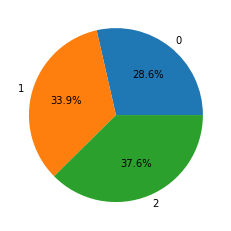

In [125]:
import matplotlib.pyplot as plt
# Creating pie charts boxplots and violin plots
#Make a pie chart of the number of samples for each label (display up to the percentage)


pieData = df.groupby(pd.Grouper(key='Species')).mean()
print(pieData)
labels = '0','1','2'
plt.pie(pieData.iloc[:,0],labels=labels,autopct='%1.1f%%')
plt.show()



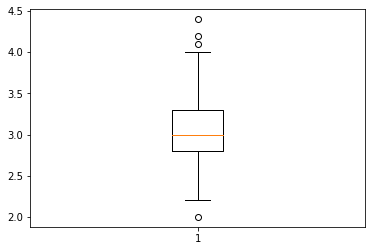

In [ ]:
#Select features one by one and visualize the distribution of data for each label using a box plot.
plt.boxplot(df.iloc[:,1])
plt.show()

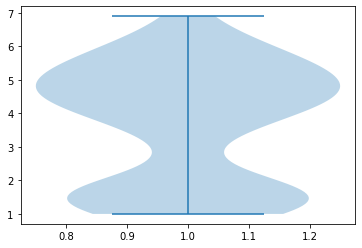

In [ ]:

#Select features one by one and visualize the distribution of data for each label using a violin plot
plt.violinplot(df.iloc[:,2])
plt.show()

[Problem 7] Confirmation of the relationship between features

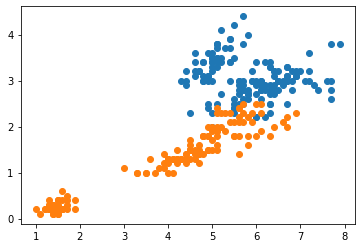

In [ ]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)']) # blue one 
plt.scatter(df['petal length (cm)'],df['petal width (cm)']) # orange one
plt.show()

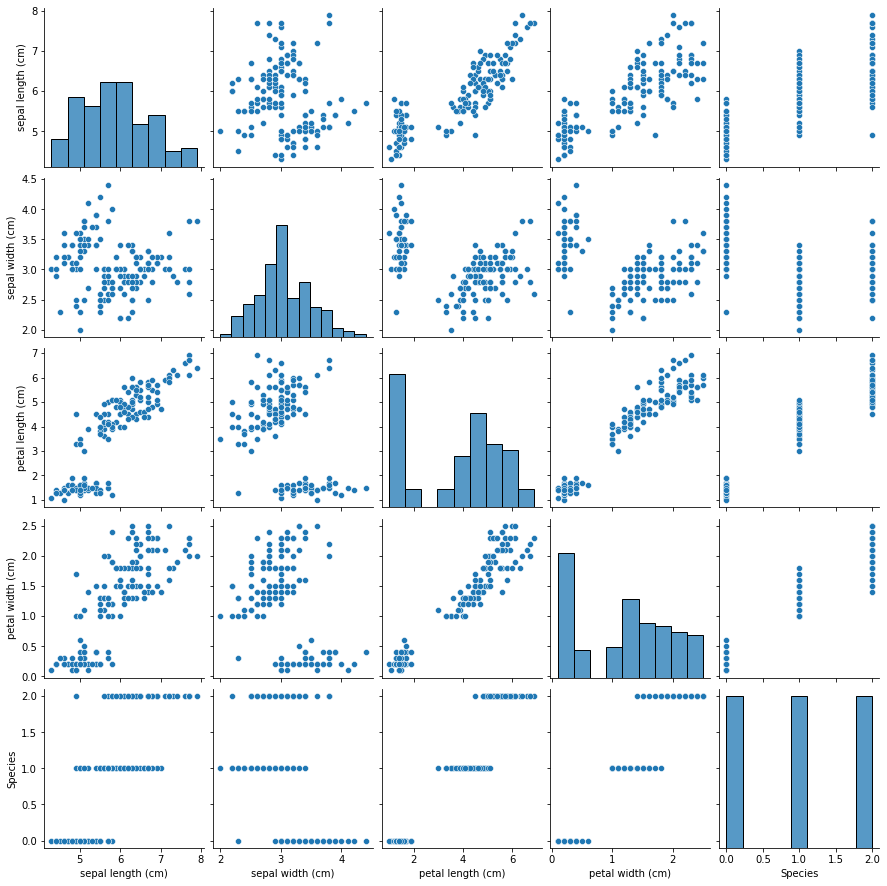

In [ ]:
#Create a scatterplot matrix that displays all the combinations of features at once.
import seaborn as sns
sns.pairplot(df)

In [ ]:
#Create a correlation coefficient matrix for four features
df.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


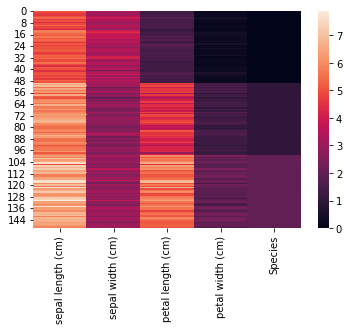

In [ ]:
#Make a heat map of the correlation coefficient matrix (1)
heatmap = sns.heatmap(df)

[Problem 8] Explanation of the results of visualized graphs and tables



We can see the from correlation table that if there is a positive value the data has positive correlation /for example, sepal length values except sepal width/, if there is a 0 value data has no relation, if there is a negative value data has correlation. In general the data correlaton positive.


From scatterplot matrix we can see that for data has sepal length with 5,6 is more than other length.